# 128311 blind search

We demonstrate how to conduct a blind search in pre- and post-uprade-separate HIRES data. NOTE: If notebook is not working, can just open iPython, import rvsearch.search and rvsearch.utils, and run the search with the 3 commands below.

In [1]:
import os

import radvel
import rvsearch
from rvsearch import search, inject, utils, plots, driver

- Load the data and initialize the search object.
- Bin data within 12 hours, and search down to 10 days.

In [4]:
data = utils.read_from_csv('../../Planets/rvdata/vst128311.csv', binsize=0.5)
searcher = search.Search(data, starname='128311', min_per=60, 
                         workers=8, mcmc=False, verbose=True, mstar=[1., 0.05])

Run search on a single core. In general, you'll want to allocate more CPUs for the search, but multi-threading within the Jupyter notebook environment is buggy. Run MCMC after search is done (default). With our current configuration, outputs will be saved in in the current working directory. Will save periodogram for each successive search, orbit plots, and corner plot.

  0%|          | 0/769 [00:00<?, ?it/s]

Number of test periods: 769
Calculating BIC periodogram for 1 planets vs. 0 planets


  0%|          | 0/769 [00:00<?, ?it/s]

RV multi-panel plot saved to /Users/lee/Academics/Astronomy/Planets/rvsearch/tutorials/128311/orbit_plot1.pdf
Number of test periods: 769
Calculating BIC periodogram for 2 planets vs. 1 planets


  0%|          | 0/769 [00:37<?, ?it/s] 4.68it/s]


RV multi-panel plot saved to /Users/lee/Academics/Astronomy/Planets/rvsearch/tutorials/128311/orbit_plot2.pdf
Number of test periods: 769
Calculating BIC periodogram for 3 planets vs. 2 planets


  0%|          | 0/769 [01:09<?, ?it/s] 5.48it/s]


RV multi-panel plot saved to /Users/lee/Academics/Astronomy/Planets/rvsearch/tutorials/128311/orbit_plot2.pdf


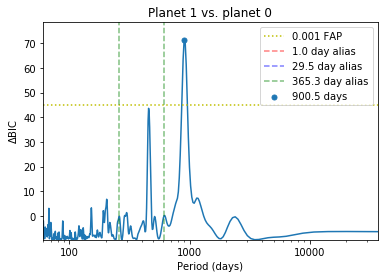

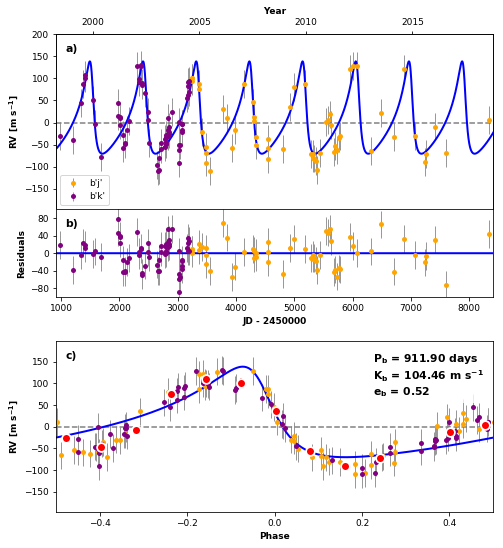

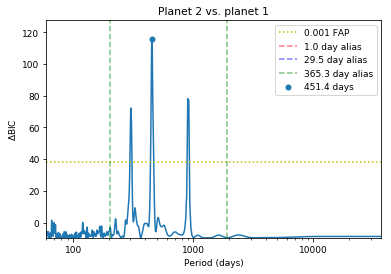

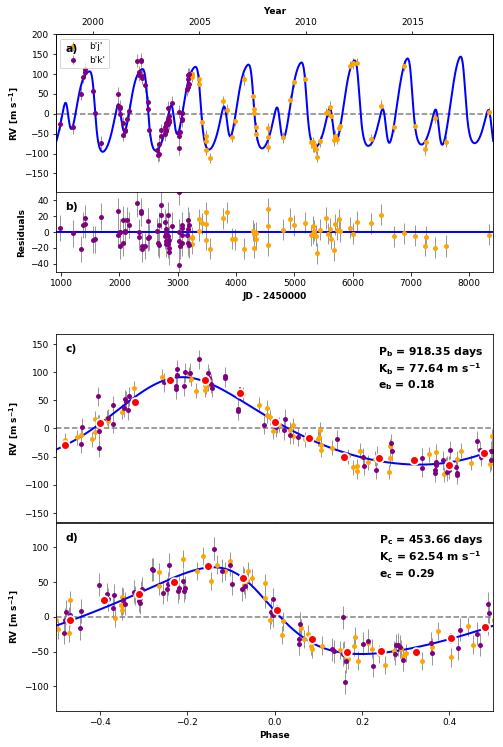

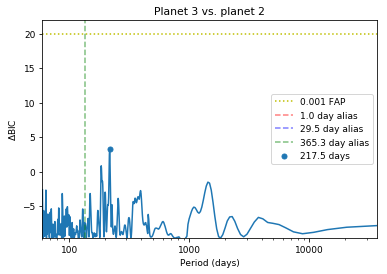

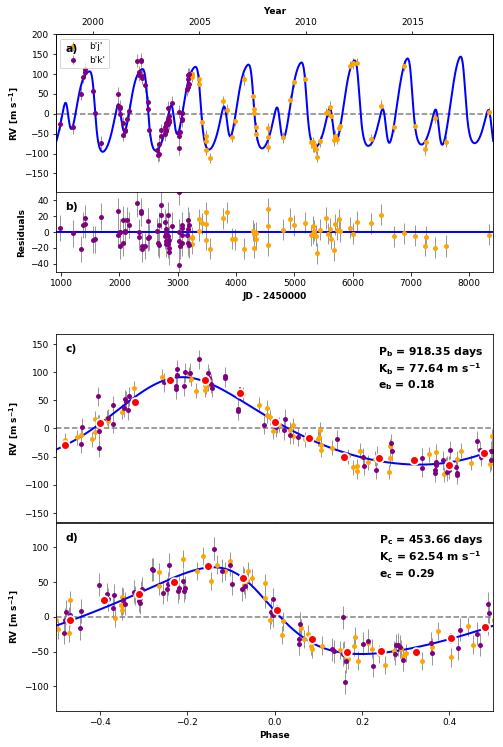

In [3]:
searcher.run_search()

## 128311 search with known planets

In [ ]:
data = utils.read_from_csv('../../Planets/rvdata/vst128311.csv', binsize=0.5)
post = radvel.posterior.load('post_final.pkl')
searcher = search.Search(data, post=post, starname='128311', min_per=60, 
                         workers=8, mcmc=False, verbose=True, mstar=[1., 0.05])

In [ ]:
searcher.run_search()

In [4]:
args = None
class _args(object):
    def __init__(self):
        self.num_cpus = 8
        self.num_inject = 1000
        self.overwrite = True
        self.mstar = 1.
        self.rstar = 1.
        self.teff = 1.
        self.minP = 2.
        self.maxP = 1e5
        self.minK = 0.1
        self.maxK = 1000.0
        self.minE = 0.0
        self.maxE = 1.0
        self.betaE = False

# Run injections.
args = _args()
args.search_dir = '128311' # Directory in which search is saved
args.full_grid = False
args.verbose = False
driver.injections(args)

Creating recovery plot for 128311
Plotting inj_msini vs. inj_au
Recovery plot saved to /Users/lee/Academics/Astronomy/Planets/rvsearch/tutorials/128311/128311_recoveries.png


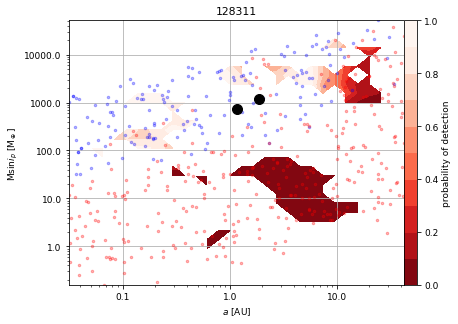

In [5]:
# Plot injections and completeness.
args.type = ['recovery']
args.fmt = 'png'
args.mstar = 1.
driver.plots(args)